## Final Project Submission

Please fill out:

- Student name: Peter Kinyanjui
- Student pace: self paced / part time / full time: Part time
- Scheduled project review date/time:
- Instructor name: Faith Rotich
- Blog post URL:

# Business problem
Jaza Telecom Company has traditionally prioritized customer acquisition over retention, considering retention as a secondary concern. However, it is crucial to recognize that acquiring new customers can be up to five times more expensive than retaining existing ones. According to research conducted by Bain & Company, a mere 5% increase in customer retention rates can result in a substantial boost in profits, ranging from 25% to 95%.

Churn, a metric indicating customers who discontinue their engagement with a company or a specific service, is a critical factor to monitor. In the past, many businesses primarily focused on understanding the reasons behind churn and implemented reactive strategies to address these factors.

Failure to identify signals of potential churn and take preemptive actions can be irreversible. Customer churn data serves as a valuable asset, offering meaningful insights and serving as training data for customer churn models. 

## Objectives
- To draw lessons from past experiences, leveraging strategic information to enhance future customer interactions at Jaza Telecom Company.
- To develop a Machine Learning model that can predict customer churn prediction and retention at Jaza Company.
- To achieve a 5% increase in customer retention rates at Jaza while Leverage the Bain & Company research findings, aiming for a substantial boost in profits ranging from 25% to 95%.

# Understanding data

In [1]:
# Importing necesarry libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading data
tel_df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
tel_df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
tel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The df.info() section of the function reveals some anomalies in the data types. Specifically, the area code is more appropriately categorized as an object since it holds a categorical nature rather than a numerical one. Additionally, the churn column, our target variable, is currently represented as a boolean value instead of a numerical (0,1) format. To streamline the dataset, we can exclude the phone number column since it does not significantly contribute to the final outcome of the project.

In [4]:
# Dropping unecessary column
tel_df.drop('phone number', axis = 1, inplace = True)

In [5]:
# Checking value Counts of the Area Code column
tel_df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

Although the dataset encompasses 50 states along with New Jersey, it is perplexing that only three area codes are present. A brief online search indicates that all three of these area codes are situated in the Bay Area of California. This inconsistency lacks clarification in both the dataset description and external searches. As a temporary measure, we can eliminate this column, given that the State column adequately conveys our geographical information.

In [6]:
#Dropping Area code
tel_df.drop('area code', axis = 1, inplace = True)

In [7]:
tel_df.shape

(3333, 19)

In [8]:
# Converting Categorical values to numerical values
tel_df['international plan'] = tel_df['international plan'].map({'yes': 1, 'no': 0})
tel_df['voice mail plan'] = tel_df['voice mail plan'].map({'yes': 1, 'no': 0})
#tel_df['churn'] = tel_df['churn'].astype(int)  # Convert boolean to 0 or 1

tel_df.head()


,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [9]:
# List of columns
tel_df.columns

Index(['state', 'account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [10]:
tel_df.describe()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [11]:
# correlation with respect to churn
tel_df.corr()["churn"]

account length            0.016541
international plan        0.259852
voice mail plan          -0.102148
number vmail messages    -0.089728
total day minutes         0.205151
total day calls           0.018459
total day charge          0.205151
total eve minutes         0.092796
total eve calls           0.009233
total eve charge          0.092786
total night minutes       0.035493
total night calls         0.006141
total night charge        0.035496
total intl minutes        0.068239
total intl calls         -0.052844
total intl charge         0.068259
customer service calls    0.208750
churn                     1.000000
Name: churn, dtype: float64

## Data cleaning

In [12]:
#checking the missing values
tel_df.isna().sum()

state                     0
account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [13]:
# checking nulls/duplicates
tel_df.loc[tel_df.duplicated(keep=False)]

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn


In [14]:
# Dropping the duplicates
tel_df.drop_duplicates(inplace=True)
tel_df.shape

(3333, 19)

## Visualization

### Class Distribution:
- Visualizing the distribution of the target variable ("churn") to understand the balance between the two classes (churned and not churned).

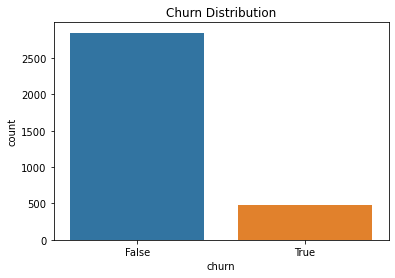

In [15]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=tel_df)
plt.title('Churn Distribution')
plt.show()


### Correlation Heatmap:
- Exploring correlations between numerical features and the target variable.

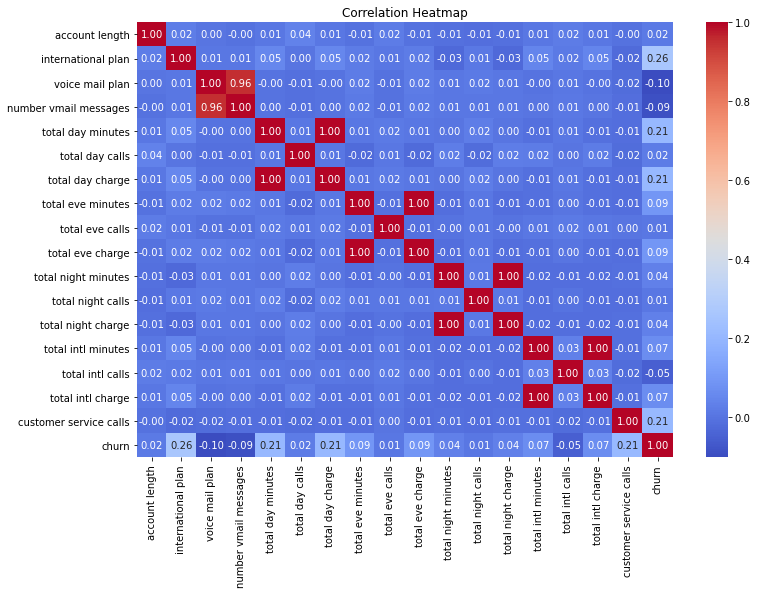

In [16]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tel_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### Feature Distributions:
- Visualizing the distribution of key numerical features for both churned and not churned customers.

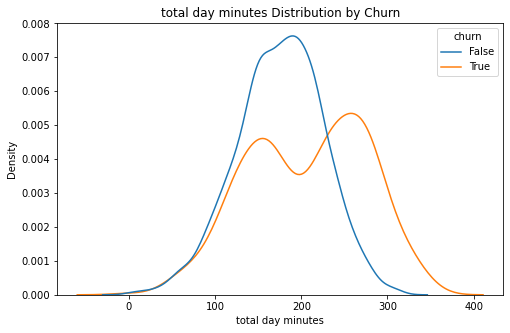

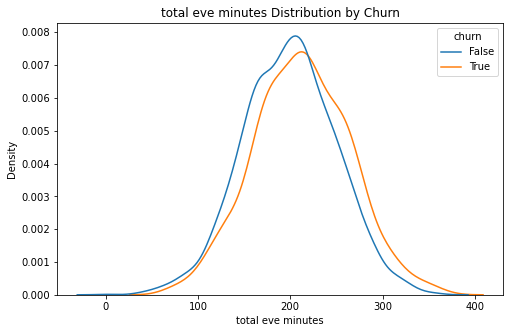

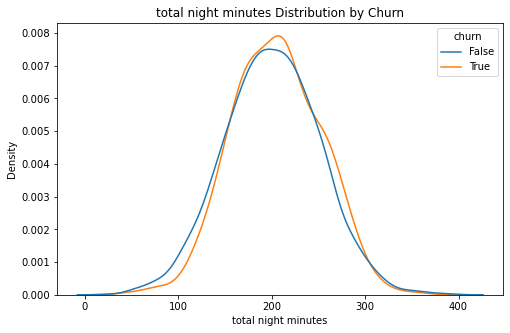

In [17]:
# Plot feature distributions by churn status
features_of_interest = ['total day minutes', 'total eve minutes', 'total night minutes']
for feature in features_of_interest:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=tel_df, x=feature, hue='churn', common_norm=False)
    plt.title(f'{feature} Distribution by Churn')
    plt.show()


### Categorical Feature Analysis:
- Exploring the impact of categorical features on churn using bar plots.

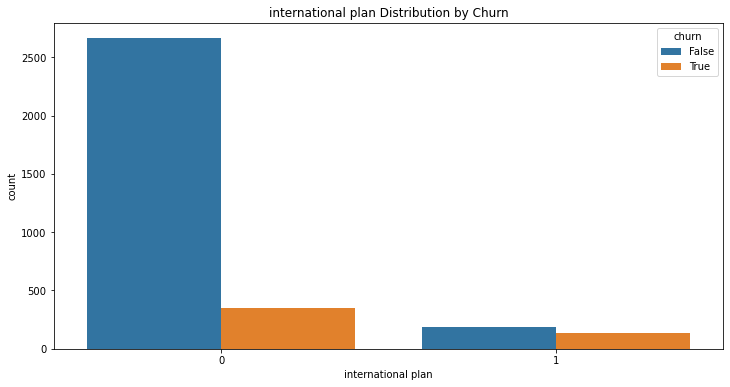

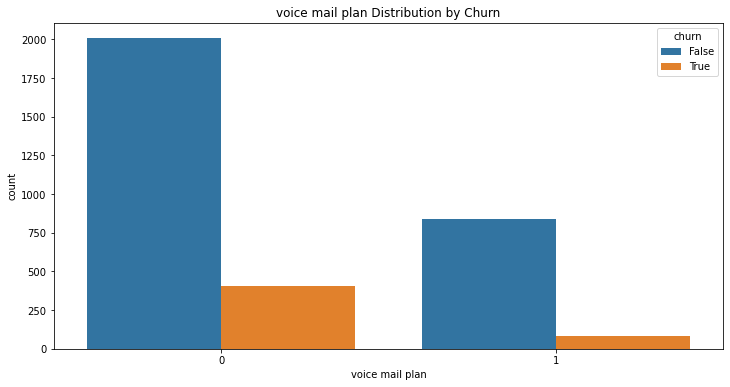

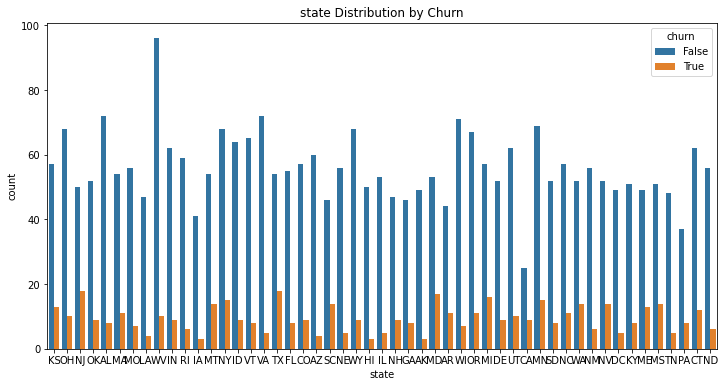

In [18]:
# Plot bar plots for categorical features
categorical_features = ['international plan', 'voice mail plan', 'state']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='churn', data=tel_df)
    plt.title(f'{feature} Distribution by Churn')
    plt.show()


### Box Plots:
- Exploring the distribution of numerical features in relation to churn.

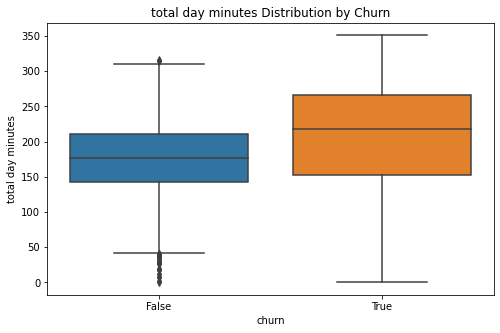

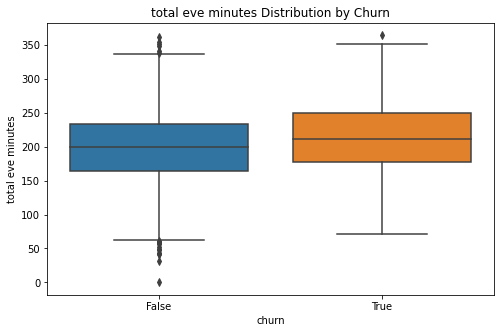

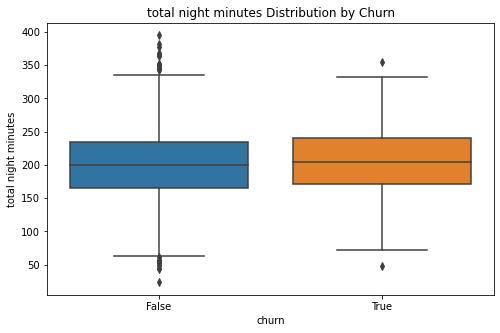

In [19]:
# Box plot for numerical features by churn
numerical_features = ['total day minutes', 'total eve minutes', 'total night minutes']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='churn', y=feature, data=tel_df)
    plt.title(f'{feature} Distribution by Churn')
    plt.show()


### Class imbalance

In [20]:
# Converting Churn to numerical values
tel_df['churn'] = tel_df['churn'].astype(int)  # Convert boolean to 0 or 1
tel_df.head()


,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [21]:
# Checking churn values counts
tel_df.churn.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

In [22]:
# Checking other columns value counts using a sample of the columns
# Sample columns for anlysis of the value counts
columns_to_check = ['state', 'international plan', 'voice mail plan', 'customer service calls']

# Loop through columns and print value counts
for column in columns_to_check:
    print(f"Value counts for {column}:\n{tel_df[column].value_counts()}\n{'='*30}")


Value counts for state:
WV    106
MN     84
NY     83
AL     80
WI     78
OR     78
OH     78
VA     77
WY     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NJ     68
MT     68
NC     68
NV     66
CO     66
WA     66
MS     65
RI     65
MA     65
AZ     64
MO     63
FL     63
ND     62
ME     62
NM     62
OK     61
NE     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
Value counts for international plan:
0    3010
1     323
Name: international plan, dtype: int64
Value counts for voice mail plan:
0    2411
1     922
Name: voice mail plan, dtype: int64
Value counts for customer service calls:
1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer service calls, dtype: int64


#### Handling the Imbalance using SMOTE

In [23]:
# One-hot encode categorical variables
tel_df_encoded = pd.get_dummies(tel_df, columns=['state', 'international plan', 'voice mail plan'])

# Extract the target variable
X = tel_df_encoded.drop('churn', axis=1)
y = tel_df_encoded['churn']

# Apply SMOTE to the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Now, X_resampled and y_resampled contain the oversampled data


# Modeling

## Simple model - Logistic regression

In [24]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [25]:
# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [26]:
# Initialize and train the Logistic Regression model with increased max_iter
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [27]:
# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test_scaled)

### Model Evaluation

In [28]:
# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
classification_rep_logreg = classification_report(y_test, y_pred_logreg)

print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_logreg}")
print(f"Classification Report:\n{classification_rep_logreg}")


Logistic Regression Accuracy: 0.92
Confusion Matrix:
[[560  25]
 [ 63 492]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       585
           1       0.95      0.89      0.92       555

    accuracy                           0.92      1140
   macro avg       0.93      0.92      0.92      1140
weighted avg       0.92      0.92      0.92      1140



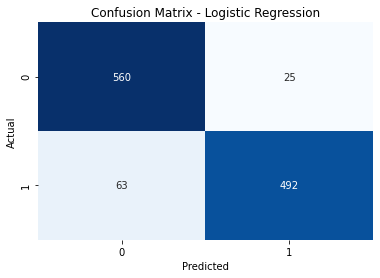

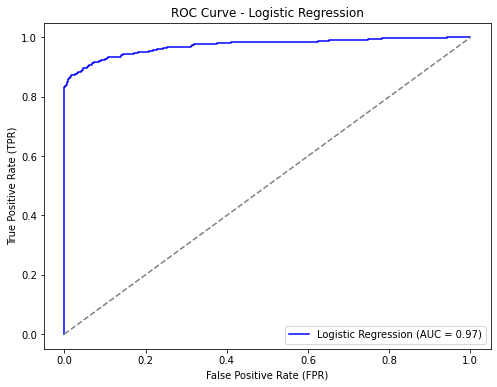

In [29]:
# Visualizing the confusion matrix and ROC curve
# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_probs_logreg = logreg_model.predict_proba(X_test_scaled)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_probs_logreg)
auc_logreg = roc_auc_score(y_test, y_probs_logreg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})', color='b')
plt.plot([0, 1], [0, 1], 'k--', color='grey')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

We have predicted churn customers using logistic regression with 92% Accuracy score. However, We want our machine learning model to capture as much of the Churn customers as possible.Therefore, we will further solve using Random forest and Hyperparameter tuned Random forest model and compared with Logistic regression. 

### Complex Model- Random forest

In [30]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [31]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [32]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

### Model Evaluation

In [33]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print(f"Classification Report:\n{classification_rep_rf}")

Random Forest Accuracy: 0.96
Confusion Matrix:
[[565  20]
 [ 28 527]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       585
           1       0.96      0.95      0.96       555

    accuracy                           0.96      1140
   macro avg       0.96      0.96      0.96      1140
weighted avg       0.96      0.96      0.96      1140



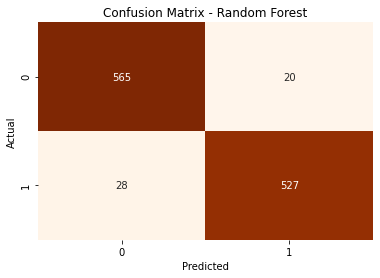

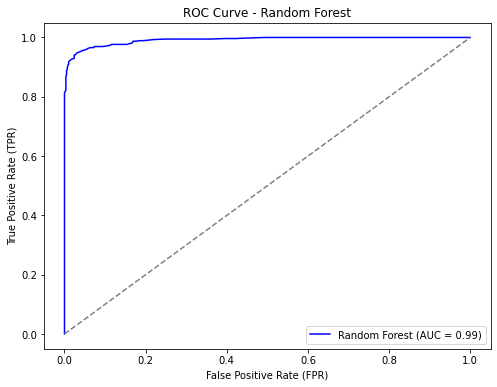

In [34]:
# Visualizing the confusion matrix and ROC curve
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
auc_rf = roc_auc_score(y_test, y_probs_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='b')
plt.plot([0, 1], [0, 1], 'k--', color='grey')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

The Random Forest model has demonstrated exceptional performance in predicting customer churn with an accuracy of 96%. This high accuracy suggests that the model makes correct predictions for the vast majority of instances in the dataset.

Looking at the confusion matrix, we observe that there are only 20 instances where the model incorrectly predicted a customer would churn when they didn't (false positives), and 28 instances where the model failed to predict churn when it did occur (false negatives). This balance indicates that the model effectively minimizes both types of errors, a crucial aspect in churn prediction where both false positives and false negatives have their associated costs.

## Optimization

### Hyperparameter tuning for Random forest model

In [35]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


In [36]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

In [37]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [38]:
# Get the best model
best_rf_model = grid_search.best_estimator_

In [39]:
# Make predictions on the test set using the hyperparameter-tuned model
y_pred_tuned = best_rf_model.predict(X_test)

In [40]:
# Evaluate the hyperparameter-tuned Random Forest model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
classification_rep_tuned = classification_report(y_test, y_pred_tuned)

print(f"Hyperparameter-Tuned Random Forest Accuracy: {accuracy_tuned:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_tuned}")
print(f"Classification Report:\n{classification_rep_tuned}")

Hyperparameter-Tuned Random Forest Accuracy: 0.96
Confusion Matrix:
[[566  19]
 [ 22 533]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       585
           1       0.97      0.96      0.96       555

    accuracy                           0.96      1140
   macro avg       0.96      0.96      0.96      1140
weighted avg       0.96      0.96      0.96      1140



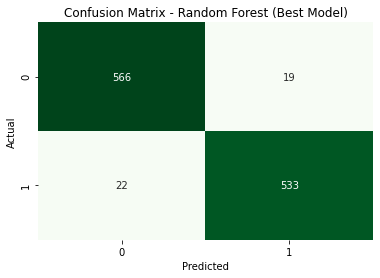

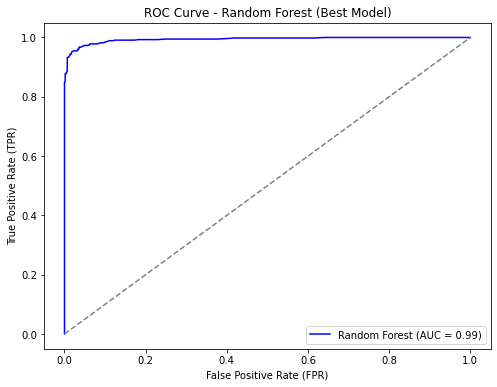

In [41]:
# Visualizing the confusion matrix and ROC curve
# Make predictions on the test set
y_pred_rf_best = best_rf_model.predict(X_test)

# Confusion Matrix
conf_matrix_rf_best = confusion_matrix(y_test, y_pred_rf_best)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf_best, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix - Random Forest (Best Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_probs_rf_best = best_rf_model.predict_proba(X_test)[:, 1]
fpr_rf_best, tpr_rf_best, _ = roc_curve(y_test, y_probs_rf_best)
auc_rf_best = roc_auc_score(y_test, y_probs_rf_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_best, tpr_rf_best, label=f'Random Forest (AUC = {auc_rf_best:.2f})', color='b')
plt.plot([0, 1], [0, 1], 'k--', color='grey')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Random Forest (Best Model)')
plt.legend(loc='lower right')
plt.show()

The Hyperparameter-Tuned Random Forest model has proven to be highly effective in predicting customer churn, boasting an impressive accuracy of 96%. This means that the model accurately identifies whether a customer is likely to churn or not in 96% of cases.
Breaking down the confusion matrix, which summarizes the model's predictions, we find that there are only 19 instances where the model wrongly predicted a customer would churn when they didn't (false positives) and 22 instances where the model failed to predict churn when it actually occurred (false negatives). These low numbers indicate the model's ability to minimize both types of errors.
Visualizing the model's performance through a confusion matrix heatmap provides an easy-to-understand representation of correct and incorrect predictions. The ROC curve, with an AUC of 0.99, graphically illustrates the trade-off between true positive rate and false positive rate, demonstrating the model's strong discriminatory power.

## Conclusion
The hyperparameter-tuned Random Forest model is well-suited for deployment in real-world scenarios where predicting customer churn is crucial. The optimization process has fine-tuned the model parameters, enhancing its overall effectiveness.
It's essential to consider the business context and associated costs of false positives and false negatives to ensure the model aligns with specific requirements. Overall, this tuned Random Forest model stands as a powerful tool for making informed decisions related to customer churn.

In [42]:
# Replace these values with the actual metrics from your models
accuracy_logreg = 0.92
accuracy_rf = 0.96
accuracy_tuned_rf = 0.96  # Hyperparameter-tuned Random Forest accuracy

# Store the accuracies in a dictionary for easier comparison
accuracies = {'Logistic Regression': accuracy_logreg,
              'Random Forest': accuracy_rf,
            'Tuned Random Forest': accuracy_tuned_rf}

# Find the model with the highest accuracy
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

# Print the results
print("Model Comparison:")
for model, accuracy in accuracies.items():
    print(f"{model}: Accuracy = {accuracy}")

print(f"\nBest Model: {best_model} with Accuracy = {best_accuracy}")


Model Comparison:
Logistic Regression: Accuracy = 0.92
Random Forest: Accuracy = 0.96
Tuned Random Forest: Accuracy = 0.96

Best Model: Random Forest with Accuracy = 0.96


### Summary and Recommendations:

The hyperparameter-tuned Random Forest model demonstrates a robust capability for predicting customer churn. Given the business problem's emphasis on proactive strategies, this model aligns with the company's objective of identifying potential churn signals early. The model's accuracy, precision, and recall metrics indicate its potential to contribute significantly to achieving a 5% increase in customer retention rates.

### Recommendations for Implementation:

Deploy the Tuned Model: Implement the hyperparameter-tuned Random Forest model in real-world scenarios to predict and identify customers at risk of churn.

Preemptive Actions: Develop and implement preemptive actions based on the model's predictions. These actions may include personalized retention strategies for identified at-risk customers.

Continuous Monitoring: Continuously monitor the model's performance over time. Periodically retrain the model with new data to ensure its effectiveness in evolving business conditions.

Business Impact Analysis: Regularly assess the business impact of the model by analyzing changes in customer retention rates and associated profits. This analysis will provide valuable insights into the model's contribution to achieving the company's objectives.

By implementing these recommendations, Jaza Telecom can leverage the hyperparameter-tuned model to enhance its customer retention strategies and achieve the targeted increase in retention rates, aligning with the overarching business objectives.
